<a href="https://colab.research.google.com/github/bdfsd/knu_bdna_2022_1801313/blob/main/3%EC%9E%A5_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_1801313_%EC%84%9C%ED%98%95%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3장 연습문제

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#1번 문제

In [2]:
# 1-1번 군집 1에 있는 d의 거리리
def distance(x1, y1, x2, y2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result
A = (13, 19)
B = (10, 15)
d = distance(A[0], A[1], B[0], B[1])

print(d)

5.0


In [3]:
# 1-2번 WSS 값
WSS_1 = 5**2 + 4**2 + 3**2
WSS_2 = 4**2 + 4**2
print(WSS_1)
print(WSS_2)

# 1-2번 TWSS 값
TWSS = WSS_1 + WSS_2
print(TWSS)

50
32
82


In [4]:
# 1-3번 정답 2개개

#2-1번 문제


In [5]:
# 데이터 리스트 X, Y
data = np.array([[1, 4], [4, 2], 
                [3, 7], [6, 1],
                [2, 5]]) 
data

array([[1, 4],
       [4, 2],
       [3, 7],
       [6, 1],
       [2, 5]])

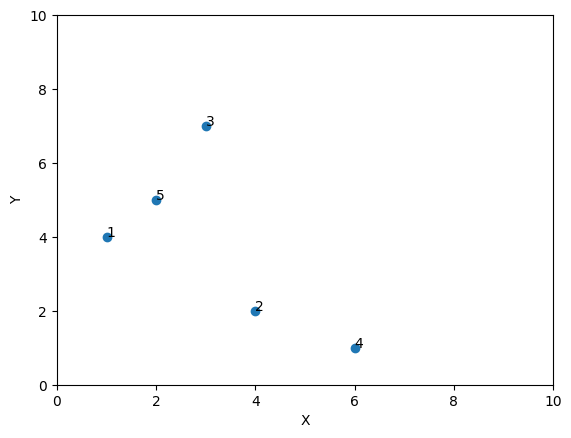

In [6]:
 # 원데이터의 X, Y의 산포도  
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 10)
plt.ylim(0, 10)

# 행과 열의 수 
rows, columns = data.shape
# 데이터 라벨 
for i in range(rows):
  plt.annotate(i+1, (data[i,0], data[i,1]))

In [7]:
# 데이터 표준화
scaler = StandardScaler()
scaler.fit(data)  #표준화 스케일러를 data에 기준을 맞춤춤
data_std = scaler.transform(data)
print(data_std)

[[-1.27872403  0.09365858]
 [ 0.46499055 -0.84292723]
 [-0.11624764  1.4985373 ]
 [ 1.62746694 -1.31122014]
 [-0.69748583  0.56195149]]


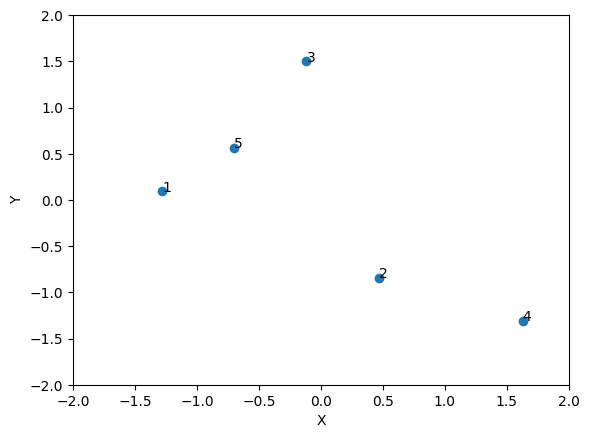

In [8]:
# 표준화 데이터의 X, Y의 산포도  
plt.scatter(data_std[:,0], data_std[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape
# 데이터 라벨 
for i in range(rows):
  plt.annotate(i+1, (data_std[i,0], data_std[i,1]))  

In [9]:
# 군집의 수를 2개로 하는 군집화 객체
kmeans = KMeans(n_clusters=2)
# 2, 3열을 이용한 군집화
kmeans.fit(data_std)
# 군집 라벨 
print(kmeans.labels_)
# 군집별 군집 중심
print(kmeans.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 0 1 0]
[[-0.69748583  0.71804912]
 [ 1.04622875 -1.07707368]]


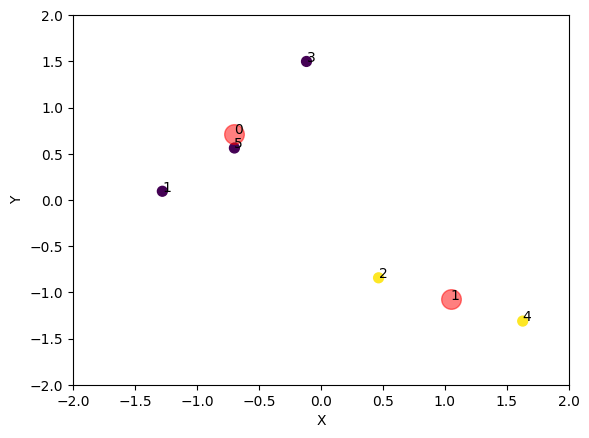

In [10]:
# 결과 분석
# 군집 데이터 분포 
plt.scatter(data_std[:,0], data_std[:,1], c=kmeans.labels_, s=50)
# plt.title('X와 Y에 대한 분포: 표준화')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape

# 데이터 라벨
for i in range(rows):
  plt.annotate(i+1, (data_std[i,0], data_std[i,1]))  

# 군집 중심 표시 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.5);
# 군집 라벨 
for k in range(columns):
  plt.annotate(k, 
              (kmeans.cluster_centers_[k, 0], kmeans.cluster_centers_[k, 1]))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

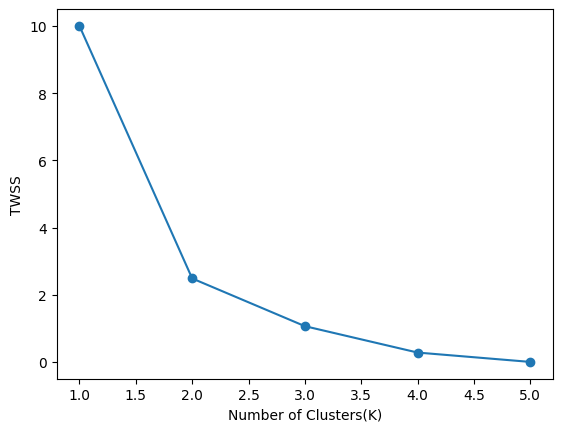

In [11]:
# 클러스터 수별 TWSS 값  
TWSS = {}
# 군집 수 1~5까지 반복 
for k in range(1, 6): 
  # 군집 수 설정과 군집화 객체 생성 
  model = KMeans(n_clusters=k)
  # 표준화된 X, Y 데이터에 대한 군집화  
  model.fit(data_std)
  # 군집 수별 TWSS 값 저장 
  TWSS[k] = model.inertia_

# 군집 수에 따른 TWSS 그래프
plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()

In [12]:
print(data_std)

[[-1.27872403  0.09365858]
 [ 0.46499055 -0.84292723]
 [-0.11624764  1.4985373 ]
 [ 1.62746694 -1.31122014]
 [-0.69748583  0.56195149]]


In [29]:
#거리 계산
import math
def distance(x1,y1,x2,y2):
  result = math.sqrt(math.pow(x1-x2,2) + math.pow(y1-y2,2))
  return result
#0번, 1번번 군집중심 정의
p0_1=(1.04622875, -1.07707368)
p0_2=(-0.69748583, 0.71804912)
p1=(-1.27872403, 0.09365858)
d_1= distance(p0_1[0],p0_1[1],p1[0],p1[1])
print(d_1)

2.603078841263637


In [14]:
p2=(0.46499055, -0.84292723)
d_2 = distance(p0_1[0], p0_1[1], p2[0], p2[1])
print(d_2)

0.6266278043518677


In [15]:
p3=(-0.11624764, 1.4985373)
d_3 = distance(p0_1[0], p0_1[1], p3[0], p3[1])
print(d_3)

2.8257960431715508


In [16]:
p4=(1.62746694, -1.31122014)
d_4 = distance(p0_1[0], p0_1[1], p4[0], p4[1])
print(d_4)

0.626627798812826


In [17]:
p5=(-0.69748583, 0.56195149)
d_5 = distance(p0_1[0], p0_1[1], p5[0], p5[1])
print(d_5)

2.3931034337023767


In [18]:
d_6 = distance(p0_2[0], p0_2[1], p1[0], p1[1])
print(d_6)

0.8530541551277572


In [19]:
d_7 = distance(p0_2[0], p0_2[1], p2[0], p2[1])
print(d_7)

1.9462781145862034


In [20]:
d_8 = distance(p0_2[0], p0_2[1], p3[0], p3[1])
print(d_8)

0.9731390613032592


In [21]:
d_9 = distance(p0_2[0], p0_2[1], p4[0], p4[1])
print(d_9)

3.085990782927198


In [22]:
d_10 = distance(p0_2[0], p0_2[1], p5[0], p5[1])
print(d_10)

0.15609763


In [23]:
#2-3 답
WSS_0 = d_1**2 + d_2**2 + d_3**2 + d_4**2 + d_5**2
print(WSS_0)

21.273411579268387


In [24]:
WSS_1 = d_6**2 + d_7**2 + d_8**2 + d_9**2 + d_10**2
print(WSS_1)

15.010405105935384


In [25]:
#2-3 답
TWSS = WSS_0 + WSS_1
TWSS

36.283816685203774

In [26]:
#2-1 표 기입
import pandas as pd
col = [0, 0]
ind = [0, 0]
con = [[0, 0], [0, 0]]
df = pd.DataFrame(con, columns=col, index=ind)

def df_maker(col_num, ind_num, fill):
    col = []
    ind = []
    con = []
    for i in range(0,col_num):
        col.append(fill)
    for i in range(0,ind_num):
        ind.append(fill)
    for i in range(0,ind_num):
        con.append(col)
    return pd.DataFrame(con, columns=col, index=ind)

df = df_maker(5,5,0)
col = ["X","Y","거리1","거리2","군집할당",]
ind = [1,2,3,4,5]
df.columns = col
df.index = ind

df["X"] = [-1.27872403,0.46499055,-0.11624764,1.62746694,-0.69748583]
df["Y"] = [0.09365858,-0.84292723, 1.4985373,-1.31122014,  0.56195149]
df["거리1"] = [0.8530541551277572,
1.9462781145862034,
0.9731390613032592,
3.085990782927198,
0.15609763]
df["거리2"] = [2.603078841263637,
0.6266278043518677,
2.8257960431715508,
0.626627798812826,
2.3931034337023767]
df["군집할당"]=[0, 1 ,0 ,1, 0]

#2-1 답
print(df)

          X         Y       거리1       거리2  군집할당
1 -1.278724  0.093659  0.853054  2.603079     0
2  0.464991 -0.842927  1.946278  0.626628     1
3 -0.116248  1.498537  0.973139  2.825796     0
4  1.627467 -1.311220  3.085991  0.626628     1
5 -0.697486  0.561951  0.156098  2.393103     0
